# CIS 545 Homework 2: Graphs

In [55]:
# Execute this once, the first time you run
!pip install networkx

# Disable Python warning messages - you should probably only run this before submission

import warnings
warnings.filterwarnings('ignore')

## Step 2.1 Spark Setup

In [56]:
# TODO: Connect to Spark as per Step 2.1
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

spark = SparkSession.builder.appName('Graphs-HW2').getOrCreate()

In [57]:
# Load some dummy data, which should be overwritten in Step 2.2

answers_sdf = spark.createDataFrame([{'from_node': 123, 'to_node': 456},\
                                    {'from_node': 456, 'to_node': 789},
                                    {'from_node': 456, 'to_node': 890}])
comments_answers_sdf = spark.createDataFrame([{'from_node': 123, 'to_node': 456}])
comments_questions_sdf = spark.createDataFrame([{'from_node': 123, 'to_node': 456}])

graph_sdf = spark.createDataFrame([{'from_node': 123, 'to_node': 456}])

## Step 2.2 Loading

In [58]:
# TODO: load data as per Step 2.2
answers_sdf = spark.read.load('sx-stackoverflow-a2q.txt', format="text")

In [59]:
comments_answers_sdf = spark.read.load('sx-stackoverflow-c2a.txt', format="text")

In [60]:
comments_questions_sdf = spark.read.load('sx-stackoverflow-c2q.txt', format="text")

In [61]:
# You may add as many cells as you like here.
# Use Insert | Insert Cell Below

## Step 2.2 Results

In [62]:
answers_sdf.count()

17823525

In [63]:
answers_sdf.show(10)

+----------------+
|           value|
+----------------+
|  9 8 1217567877|
|  1 1 1217573801|
| 13 1 1217606247|
| 17 1 1217617639|
| 48 2 1217618182|
| 17 1 1217618239|
| 19 9 1217618357|
|13 23 1217618560|
|13 11 1217618799|
|23 23 1217619360|
+----------------+
only showing top 10 rows



In [64]:
answers_sdf.printSchema()

root
 |-- value: string (nullable = true)



In [65]:
comments_answers_sdf.count()

25405374

In [66]:
comments_answers_sdf.show(10)

+--------------------+
|               value|
+--------------------+
|     1 91 1220713630|
|     3 91 1220713792|
|  380 350 1220715736|
|4642 2257 1220734307|
|4642 1324220 1220...|
|2495 4285 1220736640|
|4642 4893 1220737355|
|2515 4903 1220738560|
|2515 4893 1220739071|
|  199 199 1220741079|
+--------------------+
only showing top 10 rows



In [67]:
comments_answers_sdf.printSchema()

root
 |-- value: string (nullable = true)



In [68]:
comments_questions_sdf.count()

20268151

In [69]:
comments_questions_sdf.show(10)

+--------------------+
|               value|
+--------------------+
|4550 4550 1220729190|
|  242 184 1220733503|
|4213 4946 1220768149|
|    91 91 1220768295|
|2658 1874 1220771891|
|4035 1874 1220773037|
|2257 4489 1220802041|
|  577 577 1220834891|
|4489 4489 1220853536|
| 828 2783 1220854143|
+--------------------+
only showing top 10 rows



In [70]:
comments_questions_sdf.printSchema()

root
 |-- value: string (nullable = true)



## Step 2.3

In [71]:
# TODO: wrangling work in Step 2.3.  Add as many Cells as you need


In [72]:
answers_sdf.createOrReplaceTempView('answers_sdf_view')
answers_sdf = spark.sql("SELECT CAST(split(value, ' ')[0] AS int) AS from_node, CAST(split(value, ' ')[1] AS int) AS to_node, 'answer' AS edge_type FROM answers_sdf_view")

In [73]:
comments_questions_sdf.createOrReplaceTempView('comments_questions_sdf_view')

In [74]:
comments_questions_sdf = spark.sql("SELECT CAST(split(value, ' ')[0] AS int) AS from_node, CAST(split(value, ' ')[1] AS int) AS to_node, 'comment_on_question' AS edge_type FROM comments_questions_sdf_view")

In [75]:
comments_answers_sdf.createOrReplaceTempView('comments_answers_sdf_view')

In [76]:
comments_answers_sdf = spark.sql("SELECT CAST(split(value, ' ')[0] AS int) AS from_node, CAST(split(value, ' ')[1] AS int) AS to_node, 'comment_on_answer' AS edge_type FROM comments_answers_sdf_view")

In [77]:
graph_sdf = answers_sdf.unionAll(comments_questions_sdf).unionAll(comments_answers_sdf)

## Step 2.3 Results

In [78]:
answers_sdf.createOrReplaceTempView('answers_sdf_view')

In [79]:
comments_questions_sdf.createOrReplaceTempView('comments_questions_sdf_view')

In [80]:
comments_answers_sdf.createOrReplaceTempView('comments_answers_sdf_view')

In [81]:
answers_sdf.count()

17823525

In [82]:
answers_sdf.show(5)

+---------+-------+---------+
|from_node|to_node|edge_type|
+---------+-------+---------+
|        9|      8|   answer|
|        1|      1|   answer|
|       13|      1|   answer|
|       17|      1|   answer|
|       48|      2|   answer|
+---------+-------+---------+
only showing top 5 rows



In [83]:
answers_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- edge_type: string (nullable = false)



In [84]:
comments_answers_sdf.count()

25405374

In [85]:
comments_answers_sdf.show(5)

+---------+-------+-----------------+
|from_node|to_node|        edge_type|
+---------+-------+-----------------+
|        1|     91|comment_on_answer|
|        3|     91|comment_on_answer|
|      380|    350|comment_on_answer|
|     4642|   2257|comment_on_answer|
|     4642|1324220|comment_on_answer|
+---------+-------+-----------------+
only showing top 5 rows



In [86]:
comments_answers_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- edge_type: string (nullable = false)



In [87]:
 comments_questions_sdf.count()

20268151

In [88]:
comments_questions_sdf.show(5)

+---------+-------+-------------------+
|from_node|to_node|          edge_type|
+---------+-------+-------------------+
|     4550|   4550|comment_on_question|
|      242|    184|comment_on_question|
|     4213|   4946|comment_on_question|
|       91|     91|comment_on_question|
|     2658|   1874|comment_on_question|
+---------+-------+-------------------+
only showing top 5 rows



In [89]:
comments_questions_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- edge_type: string (nullable = false)



In [90]:
graph_sdf.count()

63497050

In [91]:
graph_sdf.show(5)

+---------+-------+---------+
|from_node|to_node|edge_type|
+---------+-------+---------+
|        9|      8|   answer|
|        1|      1|   answer|
|       13|      1|   answer|
|       17|      1|   answer|
|       48|      2|   answer|
+---------+-------+---------+
only showing top 5 rows



In [92]:
graph_sdf.printSchema()

root
 |-- from_node: integer (nullable = true)
 |-- to_node: integer (nullable = true)
 |-- edge_type: string (nullable = false)



## Step 2.4

In [93]:
# You may put any computations you need here
top_10_ans = answers_sdf.groupby('from_node').count().orderBy('count',ascending = False)

In [94]:
top_10_ans.selectExpr("from_node as node", "count as ansCounts").show(10)

+-------+---------+
|   node|ansCounts|
+-------+---------+
|  22656|    32030|
|1144035|    25146|
|  29407|    20842|
| 548225|    16944|
| 157882|    16615|
| 115145|    16515|
|  17034|    15437|
| 100297|    15020|
|   6309|    14291|
|  34397|    14033|
+-------+---------+
only showing top 10 rows



## Step 2.4.1 Results

In [95]:
# TODO: output dataframe with top 10 users by number of questions
top_10_ans = answers_sdf.groupby('from_node').count().orderBy('count',ascending = False)
top_10_ans.selectExpr("from_node as node", "count as ansCounts").show(10)

+-------+---------+
|   node|ansCounts|
+-------+---------+
|  22656|    32030|
|1144035|    25146|
|  29407|    20842|
| 548225|    16944|
| 157882|    16615|
| 115145|    16515|
|  17034|    15437|
| 100297|    15020|
|   6309|    14291|
|  34397|    14033|
+-------+---------+
only showing top 10 rows



In [96]:
# TODO: output top 10 users by number of answers to questions by distinct users
top_10_user = spark.sql("SELECT from_node AS node, COUNT(DISTINCT to_node) AS userCounts FROM answers_sdf_view GROUP BY from_node ORDER BY userCounts DESC")

In [97]:
top_10_user.show(10)

+-------+----------+
|   node|userCounts|
+-------+----------+
|  22656|     22860|
|1144035|     21032|
| 548225|     14127|
|  29407|     13043|
| 115145|     12243|
|  19068|     12114|
| 100297|     11486|
|  34397|     11368|
|  17034|     11347|
|   6309|     11057|
+-------+----------+
only showing top 10 rows



## Step 2.4.2 Results

In [101]:
# TODO: number of users whose questions have never been answered or commented on
commented = comments_questions_sdf.alias('c').join(answers_sdf.alias('a'),F.col('c.to_node') == F.col('a.to_node'),'leftanti') 

In [102]:
commented.select(commented['to_node']).distinct().count()

150681

## Step 2.4.3 Results

In [130]:
# TODO: top 10 pairs of users by mutual answers, along with the number of questions they have mutually answered.
sum_table = spark.sql("WITH mutualA AS (SELECT from_node AS fromA, to_node AS toA, COUNT(*) AS countA FROM answers_sdf_view GROUP BY from_node, to_node HAVING from_node <> to_node), mutualB AS (SELECT from_node AS fromB, to_node AS toB, COUNT(*) AS countB FROM answers_sdf_view GROUP BY from_node, to_node HAVING from_node <> to_node) SELECT fromA AS user1, toA AS user2, countA + countB AS ansCounts FROM mutualA JOIN mutualB ON mutualA.fromA = mutualB.toB AND mutualA.toA = mutualB.fromB where fromA > toA")

In [131]:
sum_table.orderBy('ansCounts',ascending = False).show(10)

+-------+-------+---------+
|  user1|  user2|ansCounts|
+-------+-------+---------+
| 366797|  15168|       65|
| 650492| 505088|       57|
|1675891|1525840|       49|
|2313718|2138752|       46|
|1931641|1642617|       41|
|  51816|  22656|       40|
| 143305|  37751|       37|
| 298661| 252000|       33|
|  22656|   4639|       32|
| 139459|  84201|       32|
+-------+-------+---------+
only showing top 10 rows



# Step 3

In [114]:
# TODO: remove these, which just create dummy data
highest_indegree_sdf = spark.createDataFrame([{'node': 123, 'indegree': 4}])
highest_outdegree_sdf = spark.createDataFrame([{'node': 123, 'outdegree': 5}])

# TODO: Fill in according to HW spec
highest_indegree_sdf = graph_sdf.groupBy("to_node").count().orderBy('count',ascending = False)
highest_indegree_sdf = highest_indegree_sdf.selectExpr("to_node as node","count as indegree")

In [115]:
highest_outdegree_sdf = graph_sdf.groupBy("from_node").count().orderBy('count',ascending = False)
highest_outdegree_sdf = highest_outdegree_sdf.selectExpr("from_node as node","count as outdegree")

## Step 3 Results

In [113]:
highest_indegree_sdf.show(5)

+-------+--------+
|   node|indegree|
+-------+--------+
|  22656|   93143|
| 548225|   54410|
|  29407|   45824|
| 157882|   39576|
|1144035|   38909|
+-------+--------+
only showing top 5 rows



In [116]:
highest_outdegree_sdf.show(5)

+-------+---------+
|   node|outdegree|
+-------+---------+
|  22656|   101663|
| 505088|    65522|
|  17034|    65260|
|1491895|    62746|
| 100297|    54330|
+-------+---------+
only showing top 5 rows



## Step 4

In [ ]:
# TODO: insert code as you like

In [118]:
#
# Step 4.1 Pre-processing
#
from pyspark.sql.functions import lit
def spark_bfs(G, origins, max_depth):
    G.cache()
    schema = StructType([
            StructField("node", IntegerType(), True)
        ])
    #initialize frontier
    frontier_sdf = spark.createDataFrame(origins, schema)
    #initialize result
    result_sdf = frontier_sdf.withColumn("depth",lit(0))  
    all_sdf = G.select(G['from_node'].alias('node')).unionAll(G.select(G['to_node'].alias('node')))
    all_sdf = all_sdf.dropDuplicates(['node'])
    #initialize visited
    visited_sdf = spark.createDataFrame([], schema)
    frontier_sdf = frontier_sdf.repartition(100, "node").cache()
    result_sdf = result_sdf.repartition(100, "node").cache()
    visited_sdf = visited_sdf.repartition(100, "node").cache()
    i=1
    while(i<max_depth+1):
        #before each iteration, make frontier a set
        frontier_sdf = frontier_sdf.distinct().cache()
        #add previous frontier to visited
        visited_sdf = visited_sdf.unionAll(frontier_sdf)
        #update current frontier
        frontier_sdf = G.alias('g').join(frontier_sdf.alias('f'),F.col('g.from_node') == F.col('f.node'))
        frontier_sdf = frontier_sdf.select(frontier_sdf['to_node'].alias('node')).cache()
        frontier_sdf = frontier_sdf.alias('f').join(visited_sdf.alias('v'),F.col('v.node') == F.col('f.node'),'leftanti')
        append_sdf = frontier_sdf.withColumn("depth",lit(i))
        #add current frontier to result dataframe
        result_sdf = result_sdf.unionAll(append_sdf).cache()
        i = i+1
    ##Your logic goes here
    return result_sdf

In [119]:
spark_bfs(comments_questions_sdf, [{'node': 4550}, {'node': 242}], 2).show(5)

+-------+-----+
|   node|depth|
+-------+-----+
|   4550|    0|
|    242|    0|
|1619254|    1|
|2332659|    1|
|5504881|    1|
+-------+-----+
only showing top 5 rows



## Step 4.1

In [ ]:
# TODO: comment out this line once your code is ready
#bfs_sdf = spark.createDataFrame([{'node': 123, 'depth': 1}, {'node': 456, 'depth': 2}])

# TODO: enable this once your code is ready
origin_map = [{'node': 4550}, {'node': 242}]
bfs_sdf = spark_bfs(comments_questions_sdf, origin_map, 2)

In [ ]:
# TODO: insert code as you like

## Step 4.1 Results

In [120]:
bfs_sdf.count()

396

In [121]:
bfs_sdf.show()

+-------+-----+
|   node|depth|
+-------+-----+
|   4550|    0|
|    242|    0|
|1619254|    1|
|2332659|    1|
|5504881|    1|
|1139389|    1|
|1940564|    1|
| 818089|    1|
|3047450|    1|
|4773326|    1|
|5070920|    1|
|2495819|    1|
|   1551|    1|
| 602291|    1|
| 451383|    1|
|4569974|    1|
| 633513|    1|
|2705465|    1|
|2605058|    1|
|  67719|    1|
+-------+-----+
only showing top 20 rows



## Step 4.2

In [122]:
#
# Step 4.2 Pre-processing
#
def friend_rec(input_sdf, graph_sdf):
    
    ##Your logic goes in here
    input_sdf.createOrReplaceTempView('input_sdf_view')
    graph_sdf.createOrReplaceTempView('graph_sdf_view')
    mutual_sdf = spark.sql("SELECT u1.node AS from_node, u2.node AS to_node FROM input_sdf_view u1 LEFT JOIN input_sdf_view u2 ON u1.node != u2.node GROUP BY u1.node, u2.node")
    mutual_sdf.cache()
    mutual_sdf.createOrReplaceTempView('mutual_sdf_view')
    friend_sdf = spark.sql("SELECT m.from_node, m.to_node FROM mutual_sdf_view m MINUS (SELECT g.from_node, g.to_node FROM graph_sdf_view g GROUP BY g.from_node, g.to_node) MINUS (SELECT g.to_node, g.from_node FROM graph_sdf_view g GROUP BY g.to_node, g.from_node)")
    friend_sdf.cache()
    return friend_sdf

In [123]:
# TODO: insert code as you like
bfs_sdf.createOrReplaceTempView('bfs_sdf_view')
filtered_bfs_sdf = spark.sql("SELECT node, depth FROM bfs_sdf_view WHERE depth = 2 GROUP BY node, depth HAVING COUNT(*)>1")

In [ ]:
# TODO: comment this line out when your function works
#friend_recommendations_sdf = spark.createDataFrame([\
                                                    #{'from_node': 123, 'to_node': 456}, \
                                                    #{'from_node': 456, 'to_node': 123}])


# TODO: enable this when your function works

friend_recommendations_sdf = friend_rec(filtered_bfs_sdf, comments_questions_sdf)

## Step 4.2 Results

In [124]:
friend_recommendations_sdf.count()

1720

In [125]:
friend_recommendations_sdf.show()

+---------+-------+
|from_node|to_node|
+---------+-------+
|    21918| 453447|
|    21918|4204628|
|    46646| 267679|
|    59017|1187554|
|   104015|  55503|
|   211452|  59017|
|   503032|2269511|
|  1406214| 503032|
|  2269511|  21918|
|  3830157| 132640|
|  4204628|  47550|
|    46646|1127460|
|    55503| 104015|
|    60602|1187554|
|   267679|1061543|
|   393268| 318811|
|  1218595|1187554|
|  1218595|4800193|
|    27483|  46646|
|    63775|  46646|
+---------+-------+
only showing top 20 rows



## Step 4.3: Graph visualization

### Once you have excecuted the cells in Step 4.2 and you have friend_recommendations_sdf, lets create friend_recommendations_df using toPandas(). This creates an in-memory dataFrame that we can use to build the graph. Here we have used ('from_node','to_node') as column names in friend_recommendations_sdf, please change it to what you have used in yours.

In [126]:
import networkx as nx

# TODO: create friend_graph NetworkX graph from friend_recommendations_df from friend_recommendations_sdf
friend_recommendations_df = friend_recommendations_sdf.toPandas()
friend_graph=nx.from_pandas_dataframe(friend_recommendations_df, 'from_node', 'to_node')

## Step 4.3 Results

In [127]:
print ("Number of nodes (characters) in this graph is", friend_graph.order()) # number of nodes
print ("Number of edges in this graph is", len(friend_graph.edges())) # number of edges
print ("Graph diameter is", nx.diameter(friend_graph)) # maximum eccentricity

Number of nodes (characters) in this graph is 42
Number of edges in this graph is 860
Graph diameter is 2


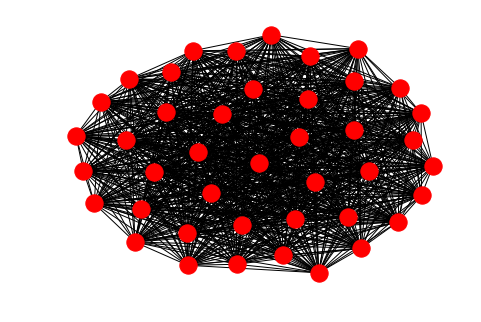

In [128]:
%matplotlib inline
nx.draw(friend_graph)